In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time

import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 12.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_path = '/content/drive/MyDrive/thesis/dataset/maxed_train.xlsx'
test_path = '/content/drive/MyDrive/thesis/dataset/test.xlsx'

In [ ]:
train = pd.read_excel(train_path)
train.head()

test = pd.read_excel(test_path)
test.head()



,text,classes
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!,joy
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,",anger
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,joy
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,joy
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,anger


In [ ]:
len(train.text.value_counts())

15363

In [ ]:
len(test.text.value_counts())

3840

In [ ]:
train.shape

(21510, 2)

In [ ]:
test.shape

(3840, 2)

In [ ]:
train.dropna()

,text,classes
0,ভাই পনারা এখনো বেপারটা ভুজেন নাই বাংলা দেশের ব...,surprise
1,ইভ টিজিংয়ের প্রতিবাদ করায় বগুড়ায় বখাটেদের হামল...,anger
2,মনের মধ্যে যত ই কষ্ট থাক না কেন যে কোনো মানুষ ...,disgust
3,সেই টিভি আর ঘড়ি পাওয়া গেছে! (ছবি),joy
4,একমাত্র তোর কাছেই আগল খুলে ঝাঁপিয়ে\nপড়তে ভয় কর...,fear
...,...,...
21505,হাসপাতাল থেকে ছাড়া পেয়েছেন শচীন টেন্ডুলকার।,surprise
21506,সব ম্যাচ জিততে হবে এটা কেউ আশা করে না।,surprise
21507,"মানাবতাবাতী সুলতানা আপা কই,?",disgust
21508,এতো অনিয়মের কয়টার কথা মানুষ বলবে?,joy


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['encoded_classes'] = encoder.fit_transform(train['classes'])
train.head()

test['encoded_classes'] = encoder.fit_transform(test['classes'])
test.head()

,text,classes,encoded_classes
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে!,joy,3
1,"সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,",anger,0
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,joy,3
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,joy,3
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,anger,0


In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
train['text'] = train.text.apply(lambda x: preprocessing(str(x)))

In [ ]:
test['text'] = test.text.apply(lambda x: preprocessing(str(x)))

In [ ]:
train.reset_index(drop=True, inplace=True)

In [ ]:
xtrain = train['text']
ytrain = train['encoded_classes']
xtest = test['text']
ytest = test['encoded_classes']

In [ ]:
df = pd.DataFrame(xtest)
df1 = pd.DataFrame(ytest)

In [ ]:
df.head()

,text
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে
1,সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...


In [ ]:
df.shape

(3840, 1)

In [ ]:
df1.shape

(3840, 1)

In [ ]:
xtrain = xtrain.astype(str).values.tolist()
xtest = xtest.astype(str).values.tolist()

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

In [ ]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (881 > 512). Running this sequence through the model will result in indexing errors


Max length:  1173


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    truncation=True,
    max_length=128,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    truncation=True,
    max_length=128,
    return_tensors='pt'
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

In [ ]:
!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
checkpoint="bert-base-multilingual-cased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=16;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


53780


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.4082101097821569


Epoch 1:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.2040875008493916


Epoch 2:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1320625983397505


Epoch 3:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.0192424951030468


Epoch 4:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.8610308404891364


Epoch 5:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.7072697209368168


Epoch 6:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.5713124554548876


Epoch 7:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.4647129951204236


Epoch 8:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.39723107832379695


Epoch 9:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.3184701557871745


Epoch 10:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.2551610810979515


Epoch 11:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.21749445164798525


Epoch 12:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.18717155674143943


Epoch 13:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.15330402744662427


Epoch 14:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.12882033179477917


Epoch 15:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.11470135791317618


Epoch 16:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.09919100794256722


Epoch 17:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.08978020197469616


Epoch 18:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.07755388800877705


Epoch 19:   0%|          | 0/2689 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.06736162944891923


In [ ]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
val_loss, predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(predictions, true_vals)

In [ ]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  3.1371132198902463
Val F1 =  0.5129006597000086


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5143229166666666


In [ ]:
df2 = pd.DataFrame(predictions)
df2.shape

(3840, 6)

In [ ]:
df3 = pd.DataFrame(true_vals)
df3.shape

(3840, 1)

In [ ]:
df1.reset_index(inplace=True, drop=True)
df.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
df3.reset_index(inplace=True, drop=True)

In [ ]:
df4 = pd.concat([df, df1, df2, df3], axis = 1)

In [ ]:
df4.shape

(3840, 9)

In [ ]:
df4.head()

,text,encoded_classes,0,1,2,3,4,5,0
0,এত দূর দূর্নীতির সুযোগ পেলো কি করে,3,-0.462291,-2.068922,-2.376323,8.054482,-1.450607,-2.151245,3
1,সিরিয়াসলি এত চোর যে গুনে শেষ করা যাচ্ছে না,0,6.296990,-0.353953,1.497949,-0.873148,-1.328904,-4.624204,0
2,সবদিক বিবেচনায় সৌরবিদ্যুতই বাংলাদেশের টেকসই জ্...,3,0.640984,4.470427,-2.991420,-3.373342,1.363682,-0.008879,3
3,সব চোরের দল গুলোর আবার গোরা থেকে মুসলমানি করে ...,3,1.838195,0.394973,-1.906993,6.417139,-4.193667,-2.598904,3
4,রাতে শুয়ে শুয়ে গভীর মনোযোগ দিয়ে বই পড়ছিলাম কি...,0,-2.002107,-1.319285,8.593194,-2.008852,-1.517687,-0.702957,0


In [ ]:
df4.to_csv('/content/drive/MyDrive/thesis/alvert_output.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

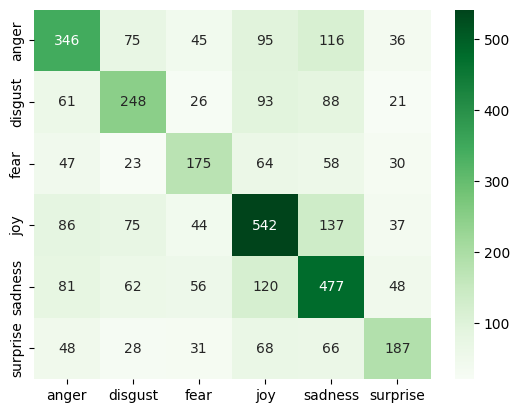

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

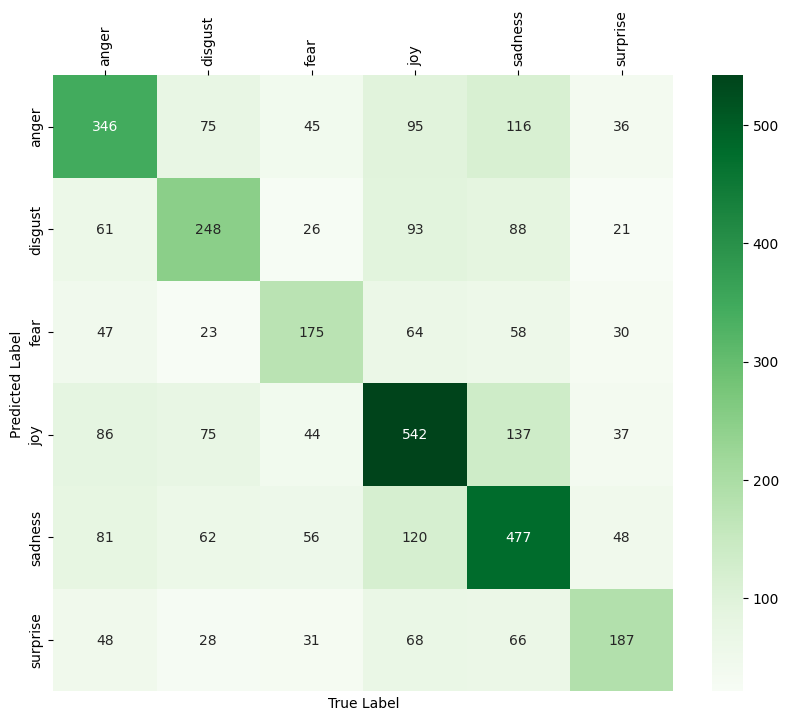

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,51.72,48.53,50.07,713.000000
disgust,48.53,46.18,47.33,537.000000
fear,46.42,44.08,45.22,397.000000
joy,55.19,58.85,56.96,921.000000
sadness,50.64,56.52,53.42,844.000000
surprise,52.09,43.69,47.52,428.000000
accuracy,51.43,51.43,51.43,0.514323
macro avg,50.76,49.64,50.09,3840.000000
weighted avg,51.36,51.43,51.29,3840.000000
